<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#### Read the data

Load the csv file and print the first five observations.

In [4]:
df=pd.read_csv('wholesale_cust.csv')
df.head()

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,Rochester,12667,2674,9656,7561,212
1,Rochester,7058,3293,9810,9568,1757
2,Rochester,6346,3516,8808,7684,2408
3,Rochester,13251,507,1196,4221,6407
4,Rochester,22620,1777,5410,7198,3908


In [5]:
df.shape

(444, 6)

**The data definition is as follows:** <br>

**Region**:  City of the retailer

**Vegetables**: Annual spending on vegetables

**Personal_care**: Annual spending on personal care products

**Milk**: Annual spending on milk and milk products

**Grocery**: Annual spending on grocery

**Plasticware**: Annual spending on plasticware (container, bottles, dishes and so on)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any retailer whose entry is recorded more than once? If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df[df.duplicated()]

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
30,Rochester,22620,1777,5410,7198,3908
277,Oneonta,2344,1566,10678,3828,1441
317,Albany,10617,857,1795,7647,1478
430,Rochester,31012,439,16687,5429,15087
443,Oneonta,15671,562,5279,2406,555


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(439, 6)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Identify the different cities to which the retailers belong. Also, visualize their count in different cities.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

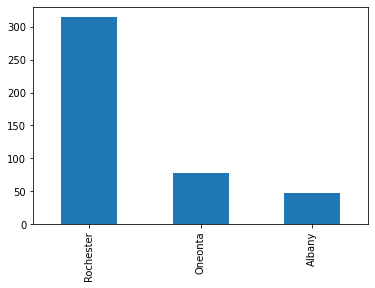

In [9]:
df['Region'].value_counts().plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Identify the extreme observations in the data using a visualization technique. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

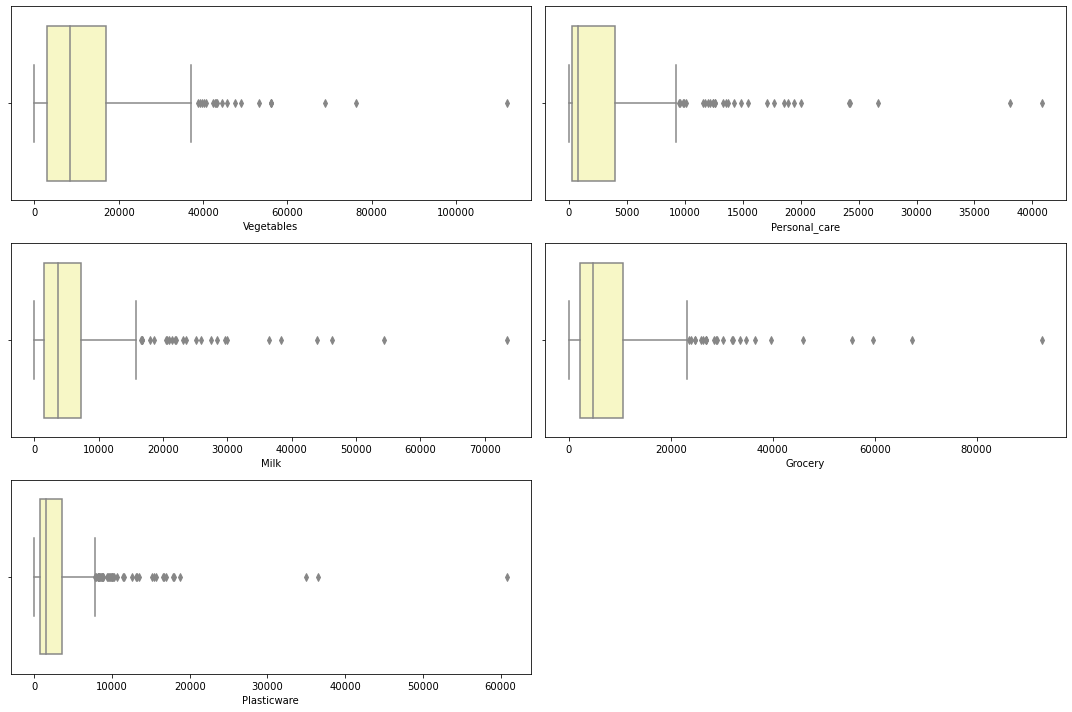

In [14]:
#Before Outliers
n=1
plt.figure(figsize=(15,10))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(3,2,n)
        n+=1
        sns.boxplot(df[i],palette='Spectral')
        plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the appropriate technique to remove the observations greater than 3*IQR above the third quartile.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# Capping.

for i in df.describe().columns:
    ll,q1,q3,ul=df[i].quantile([0.01,0.25,0.75,0.95])
    LL=q1-3*(q3-q1)
    UL=q3+3*(q3-q1)
    df[i]=df[i].map(lambda x : ll if x<LL else ul if x>UL else x)

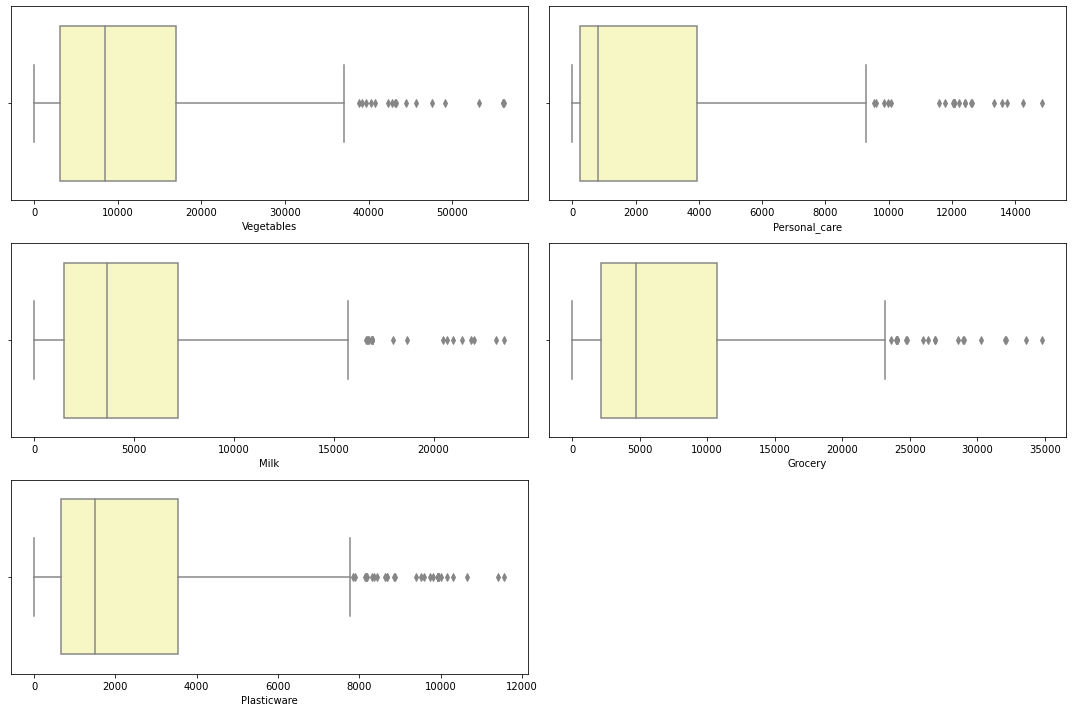

In [16]:
#Before Outliers
n=1
plt.figure(figsize=(15,10))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(3,2,n)
        n+=1
        sns.boxplot(df[i],palette='Spectral')
        plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Transform the numerical variables such that the values will be between 0 and 1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [24]:
norm_num=mm.fit_transform(df.select_dtypes(include=np.number))
df1=pd.DataFrame(data=norm_num,columns=df.select_dtypes(include=np.number).columns)
df1

,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,0.225515,0.180011,0.410347,0.217163,0.018091
1,0.125632,0.221728,0.416893,0.274860,0.151822
2,0.112953,0.236757,0.374299,0.220699,0.208171
3,0.235914,0.033967,0.050714,0.121144,0.554315
4,0.402753,0.119558,0.229850,0.206727,0.338007
...,...,...,...,...,...
434,0.528884,0.012064,0.512158,0.460543,0.859941
435,0.698501,0.006066,0.060704,0.021762,0.389596
436,0.258708,1.000000,0.658264,0.869225,0.037220
437,0.183186,0.011120,0.084084,0.063964,0.089154


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Perform K-Means clustering with varying K from 2 to 4, and identify the optimal number of clusters using the Silhouette plot.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
cluster=[2,3,4]
for i in cluster:
    k_cluster=KMeans(n_clusters=i,random_state=10)
    predict=k_cluster.fit_predict(df1)
    score=silhouette_score(df1,predict)
    print('for cluster {} the silhouette value is {}'.format(i,score))

for cluster 2 the silhouette value is 0.41357185057486323
for cluster 3 the silhouette value is 0.4106438694872322
for cluster 4 the silhouette value is 0.3444860865708436


In [27]:
X=df1.copy()

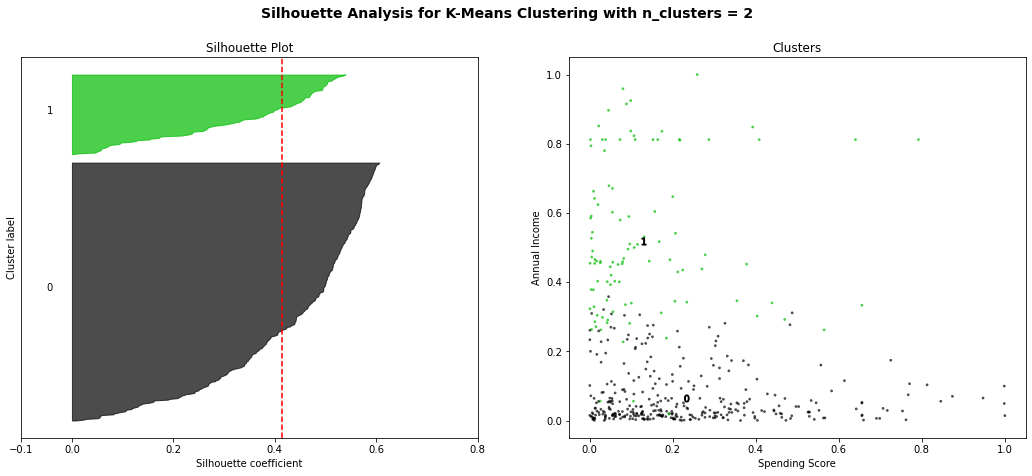

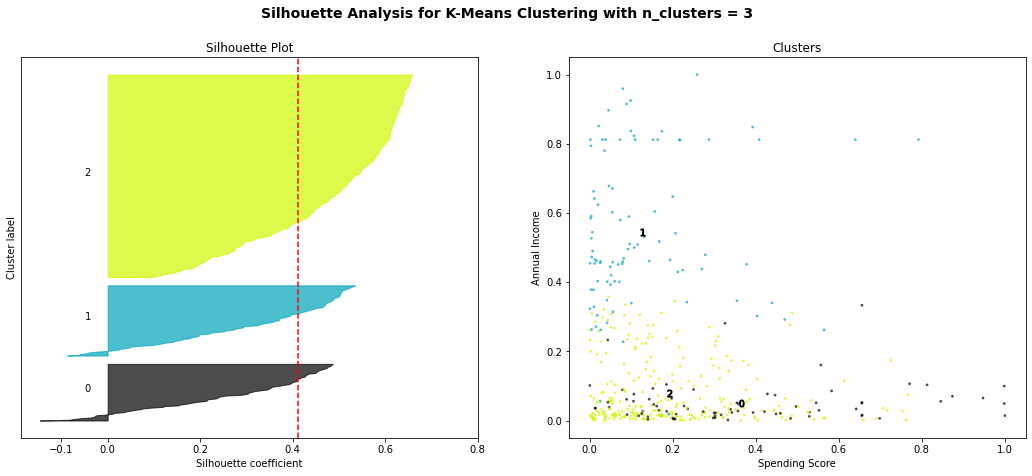

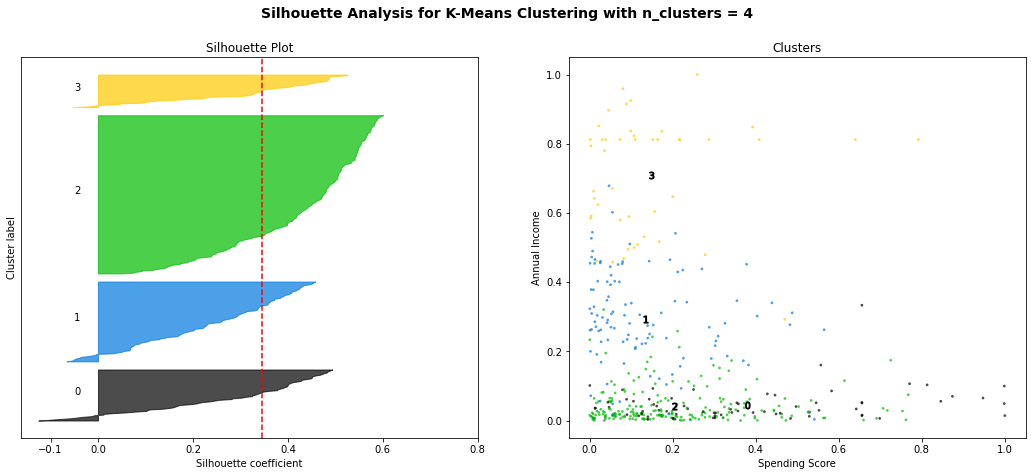

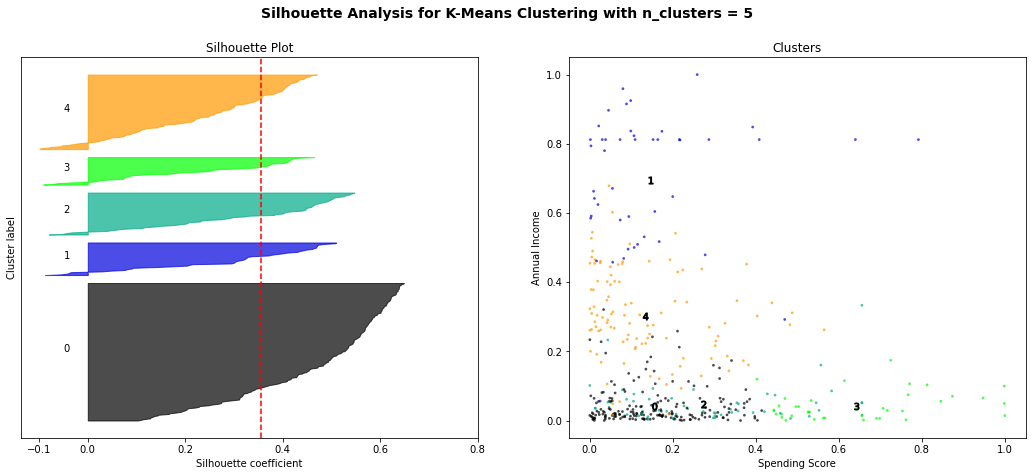

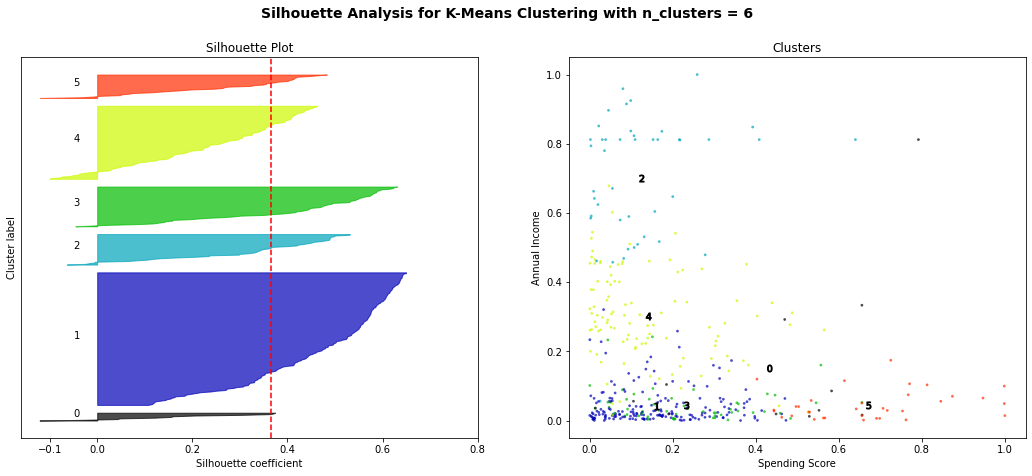

In [28]:
n_clusters = [2, 3, 4, 5, 6]

Y= np.array(X)
for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    model = KMeans(n_clusters = K, random_state = 10)
    
    cluster_labels = model.fit_predict(Y)

    silhouette_avg = silhouette_score(Y, cluster_labels)
    
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = model.cluster_centers_
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Consider the numerical variables to create two clusters and visualize them using the variables 'Vegetables' and 'Personal_care'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
k_model=KMeans(n_clusters=2,random_state=10)
k_model.fit(df1)
df1['Cluster']=k_model.labels_

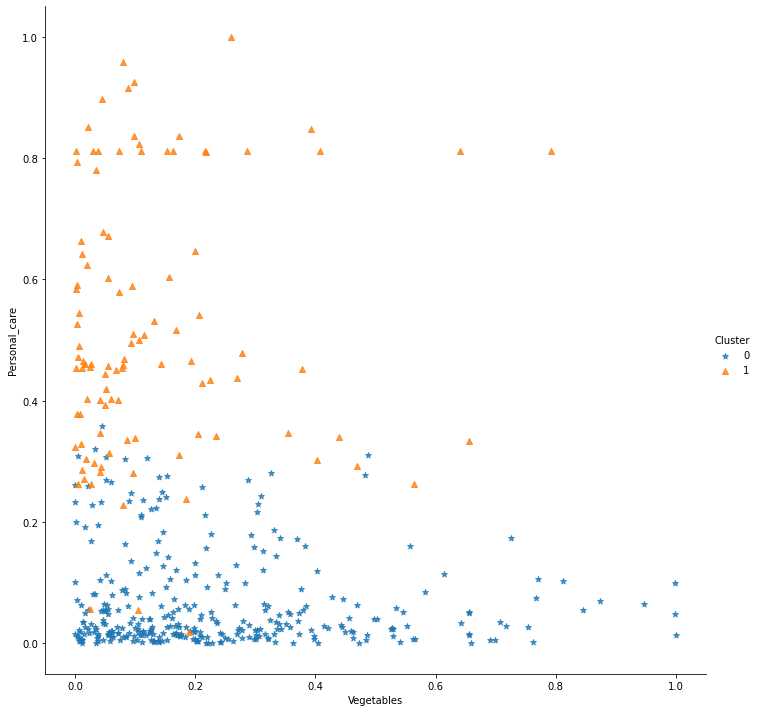

In [54]:
sns.lmplot(x ='Vegetables', y = 'Personal_care', data = df1, hue = 'Cluster', 
                markers = ['*', '^',], fit_reg = False, size = 10)

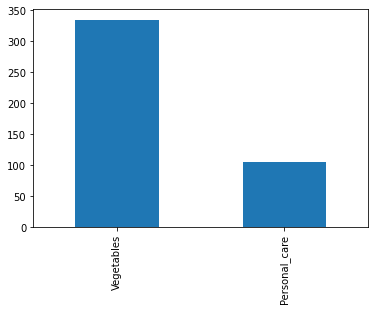

In [35]:
df1['Cluster'].value_counts().plot(kind='bar')
plt.xticks([0,1],['Vegetables','Personal_care'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Draw insights from the clusters formed in the previous question with respect to each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

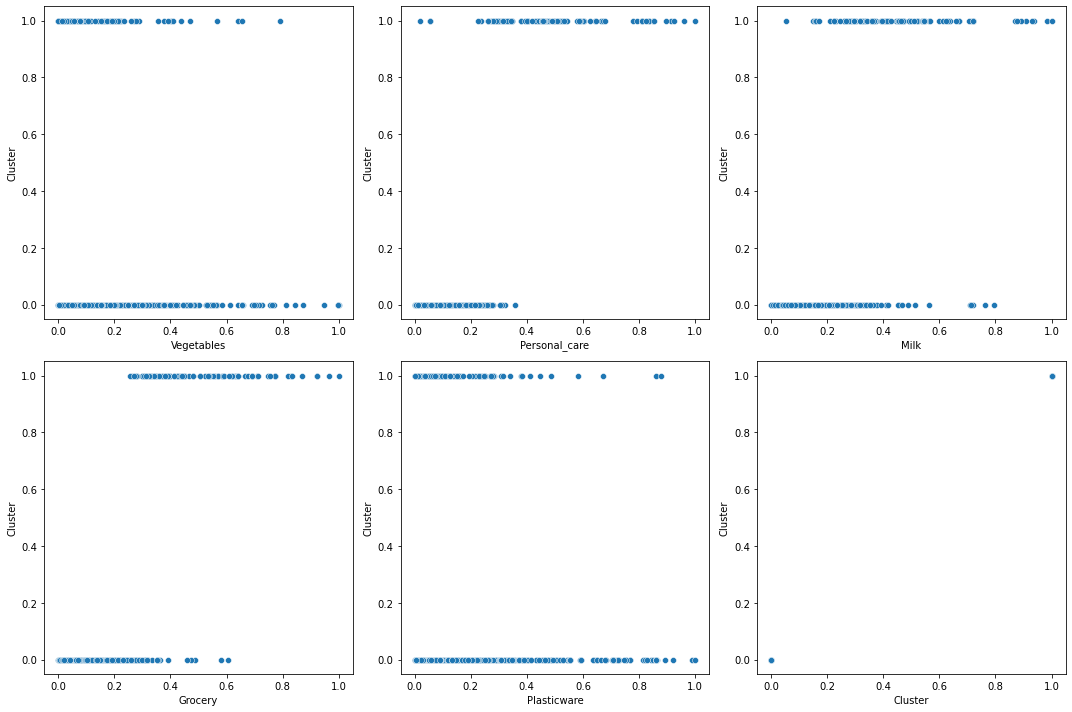

In [64]:
n=1
plt.figure(figsize=(15,10))
for i in df1.columns:
    if df1[i].dtypes!='object':
        plt.subplot(2,3,n)
        n+=1
        sns.scatterplot(x=df1[i],y=df1['Cluster'])
        plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Group the retailers from Oneonta into 1 to 5 clusters and find the optimal number of clusters using within cluster sum of squares.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
Oneonta=df[df['Region']=='Oneonta']
Oneonta.drop(columns=['Region'],inplace=True)

In [43]:
wcss=[]
for k in range(1,6):
    k_cluster=KMeans(n_clusters=k,random_state=10)
    k_cluster.fit(Oneonta)
    score=k_cluster.inertia_
    wcss.append(score)
    print('Sum of squares for cluster {} is {}'.format(k,score))

Sum of squares for cluster 1 is 17893436672.106487
Sum of squares for cluster 2 is 10976234005.638077
Sum of squares for cluster 3 is 6325489403.879998
Sum of squares for cluster 4 is 4236796582.3087797
Sum of squares for cluster 5 is 3495685466.547147


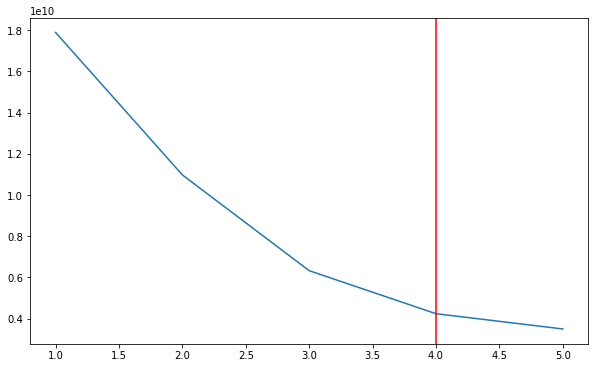

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),wcss)
plt.axvline(x=4,color='r')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Group the retailers from Oneonta into the optimal number of clusters obtained in Q9. Also, find the number of retailers in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
k_cluster=KMeans(n_clusters=4,random_state=10)
k_cluster.fit(Oneonta)
Oneonta['Cluster']=k_cluster.labels_

In [51]:
Oneonta['Cluster'].value_counts()

1    41
3    19
0    14
2     3
Name: Cluster, dtype: int64

<AxesSubplot:>

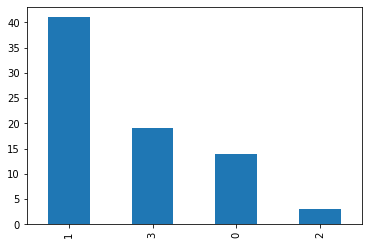

In [52]:
Oneonta['Cluster'].value_counts().plot(kind='bar')